In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

! pip install opencv-python

! pip install opencv

#import cv2

##Import any other packages you may need here

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [132]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
4143,00020383_003.png,No Finding,3,20383,050Y,M,PA,3056,2544,0.139,0.139
4644,00023219_000.png,No Finding,0,23219,048Y,M,PA,2992,2991,0.143,0.143
1379,00007151_000.png,Effusion|Pleural_Thickening,0,7151,048Y,F,PA,2048,2500,0.168,0.168


In [133]:
## EDA
# Todo 

import pandas as pd
df = pd.read_csv("Data_For_Exploration.csv")

df_original_copy = df #*lets just make a copy of this dataframe

pd.set_option("display.max.columns", None)
df.head(50)

,Unnamed: 0,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Pneumonia_or_Infiltration
0,0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143000,0.143000,NaN,/data/images_001/images/00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143000,0.143000,NaN,/data/images_001/images/00000001_001.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168000,0.168000,NaN,/data/images_001/images/00000001_002.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171000,0.171000,NaN,/data/images_001/images/00000002_000.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143000,0.143000,NaN,/data/images_001/images/00000003_000.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168000,0.168000,NaN,/data/images_001/images/00000003_001.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168000,0.168000,NaN,/data/images_001/images/00000003_002.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143000,0.143000,NaN,/data/images_001/images/00000003_003.png,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
8,8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168000,0.168000,NaN,/data/images_001/images/00000003_004.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143000,0.143000,NaN,/data/images_001/images/00000003_005.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Distribution of Primary Diseases in IMAGES


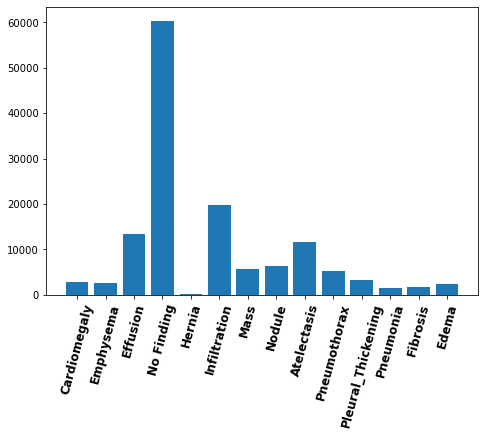

In [134]:
%matplotlib inline

print("Distribution of Primary Diseases in IMAGES")

findings_list = []
findings_list.append("Cardiomegaly")
findings_list.append("Emphysema")
findings_list.append("Effusion")
findings_list.append("No Finding")
findings_list.append("Hernia")
findings_list.append("Infiltration")
findings_list.append("Mass")
findings_list.append("Nodule")
findings_list.append("Atelectasis")
findings_list.append("Pneumothorax")
findings_list.append("Pleural_Thickening")
findings_list.append("Pneumonia")
findings_list.append("Fibrosis")
findings_list.append("Edema")

value_list = []

for idx in findings_list:
    temp = df[idx].value_counts()
    value_list.append(temp[1])
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
ax.bar(findings_list ,value_list)

plt.xticks(rotation=75, fontweight='bold', fontsize='12')

plt.show()

DISTRUBUTION of Pneumonia Positive XRAYS in dataset
Pneumonia
0    110689
1      1431
Name: Pneumonia, dtype: int64
Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive.


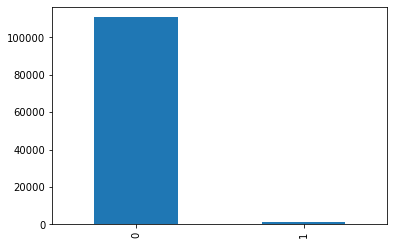

In [135]:
%matplotlib inline

print("DISTRUBUTION of Pneumonia Positive XRAYS in dataset")

print('Pneumonia')
print(df['Pneumonia'].value_counts())

df['Pneumonia'].value_counts().plot(kind='bar')

#*Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays be only a fraction of them are Pneumonia positive."

my_text = "Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive."

print(my_text)

DISTRIBUTION of Lung Infiltration in data set
Infiltration
0    92226
1    19894
Name: Infiltration, dtype: int64


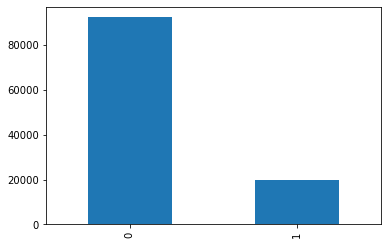

In [136]:
%matplotlib inline

print("DISTRIBUTION of Lung Infiltration in data set")
print('Infiltration')
print(df['Infiltration'].value_counts())
df['Infiltration'].value_counts().plot(kind='bar')

DISTRIBUTION of Emphysema in data set
Emphysema
0    109604
1      2516
Name: Emphysema, dtype: int64


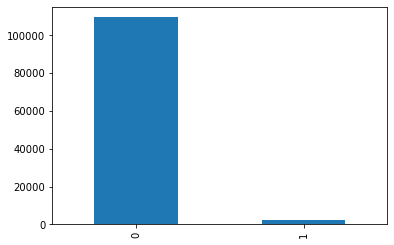

In [137]:
%matplotlib inline

print("DISTRIBUTION of Emphysema in data set")
print('Emphysema')
print(df['Emphysema'].value_counts())
df['Emphysema'].value_counts().plot(kind='bar')

DISTRIBUTION of Pneumothorax in data set


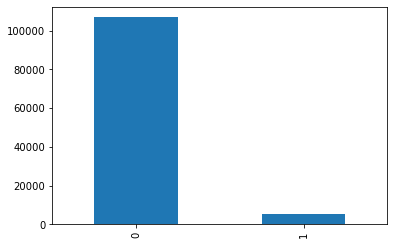

In [138]:
%matplotlib inline

print("DISTRIBUTION of Pneumothorax in data set")

df['Pneumothorax'].value_counts().plot(kind='bar')

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40
Pneumonia
0    37372
1      583
Name: Pneumonia, dtype: int64
Infiltration
0    30853
1     7102
Name: Infiltration, dtype: int64


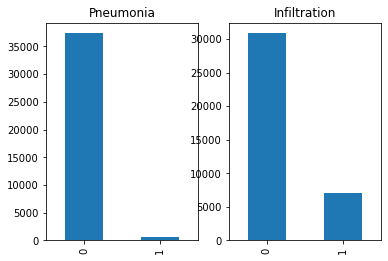

In [139]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40")

df_under_40 = df[(df['Patient Age'] >= 1) & (df['Patient Age'] <= 40)]

df_copy = df_under_40

df.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_under_40[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_under_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40
Pneumonia
0    73317
1      848
Name: Pneumonia, dtype: int64
Infiltration
0    61373
1    12792
Name: Infiltration, dtype: int64


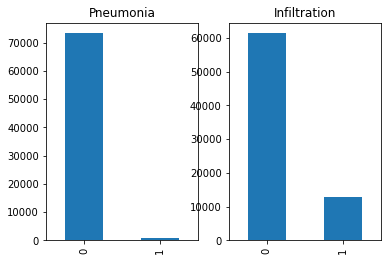

In [140]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

df_over_40 = df[(df['Patient Age'] > 40)]

df_copy = df_over_40

df_over_40.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_over_40[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_over_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40
Pneumonia
0    110689
1      1431
Name: Pneumonia, dtype: int64
Emphysema
0    109604
1      2516
Name: Emphysema, dtype: int64


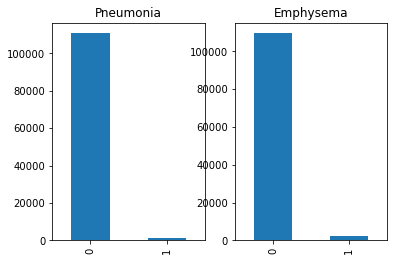

In [141]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

#df_over_40 = df[(df['Patient Age'] > 40)]

#df_over_40.head(20)

df_copy = df

categorical_features = ["Pneumonia", "Emphysema"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_copy[categorical_features]):
    print(categorical_feature)
    print(df_copy[categorical_feature].value_counts())
    df_copy[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

Lets explore our data a little deeper, including by age and gender.
Pneumonia by Gender
According to this chart most of the images are not marked Pneumonia.


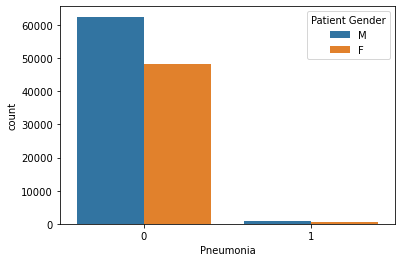

In [142]:
print("Lets explore our data a little deeper, including by age and gender.")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Pneumonia by Gender")

print("According to this chart most of the images are not marked Pneumonia.")

sns.countplot(x='Pneumonia',hue='Patient Gender', data=df)

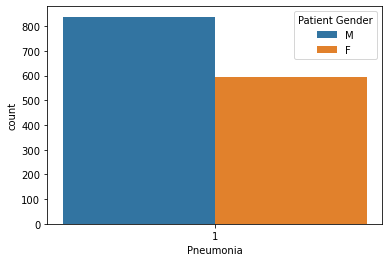

In [143]:
df_sample_pos = df[df["Pneumonia"] == 1] #*these will have pneumonia

sns.countplot(x='Pneumonia', hue='Patient Gender',data=df_sample_pos)

[(1.0, 80.0)]

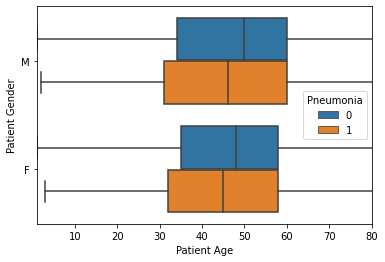

In [144]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Pneumonia', data=df)

ax.set(xlim=(1, 80))

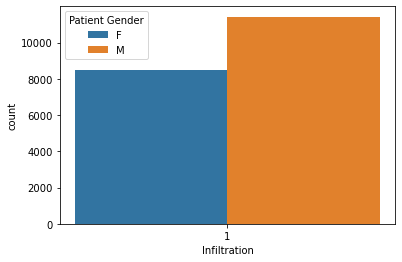

In [145]:
df_sample_pos = df[df["Infiltration"] == 1] #*these will have pneumonia

sns.countplot(x='Infiltration', hue='Patient Gender',data=df_sample_pos)

[(1.0, 80.0)]

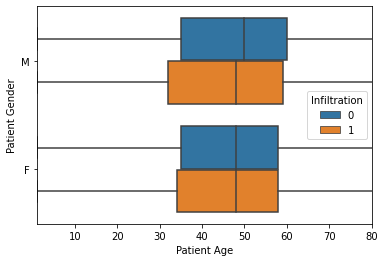

In [146]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Infiltration', data=df)

ax.set(xlim=(1, 80))

[(1.0, 70.0)]

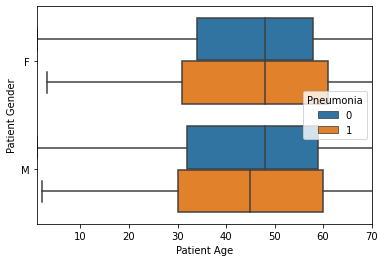

In [147]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Pneumonia', data=df_sample_pos)

ax.set(xlim=(1, 70))

[(1.0, 65.0)]

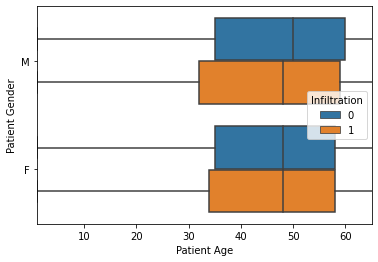

In [148]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Infiltration', data=df)

ax.set(xlim=(1, 65))

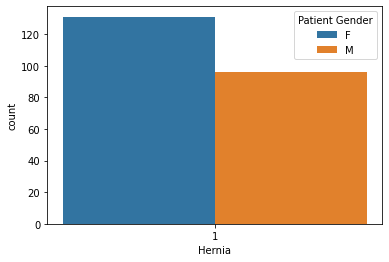

In [149]:
df_sample_pos = df[df["Hernia"] == 1] #*these will have pneumonia

sns.countplot(x='Hernia', hue='Patient Gender',data=df_sample_pos)

Even with the hernia, most of the patients seem to be a little older in our datasets.
More women seem to have hernias in the dataset than the men.


[(1.0, 90.0)]

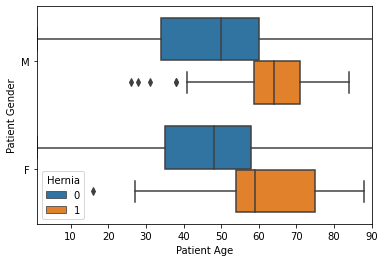

In [150]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Hernia', data=df)

print("Even with the hernia, most of the patients seem to be a little older in our datasets.")

print("More women seem to have hernias in the dataset than the men.")

ax.set(xlim=(1, 90))

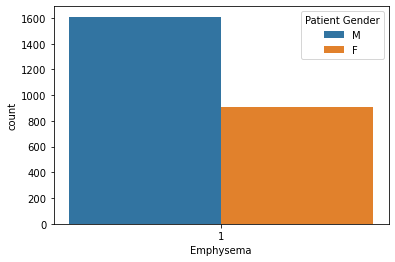

In [151]:
df_sample_pos = df[df["Emphysema"] == 1] #*these will have pneumonia

sns.countplot(x='Emphysema', hue='Patient Gender',data=df_sample_pos)

Interestingly, there is a wider age distribution with the Emphysema images. This is very surprising to me
Just anectodally it usually seems that older people tend to develop Emphysema


[(1.0, 90.0)]

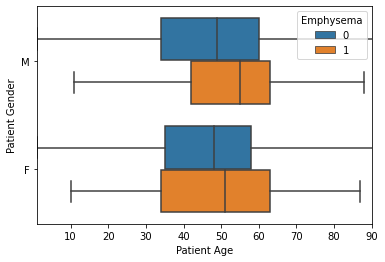

In [152]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Emphysema', data=df)

print("Interestingly, there is a wider age distribution with the Emphysema images. This is very surprising to me")
print("Just anectodally it usually seems that older people tend to develop Emphysema")

ax.set(xlim=(1, 90))

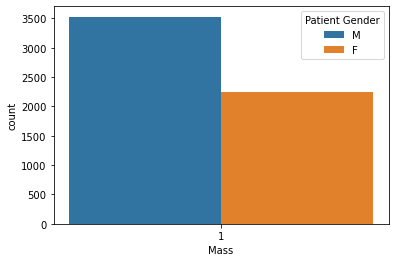

In [153]:
df_sample_pos = df[df["Mass"] == 1] #*these will have pneumonia

sns.countplot(x='Mass', hue='Patient Gender',data=df_sample_pos)

The patients with lung masses, seem to be younger overall than the patients
with emphysema and Pneumonia. This dataset is not large enough to conclude this is
common in the general population.


[(1.0, 90.0)]

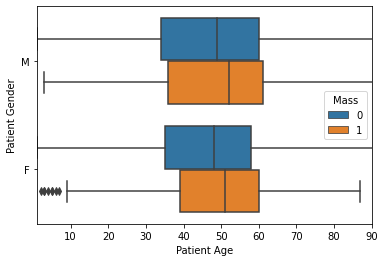

In [154]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Mass', data=df)

print("The patients with lung masses, seem to be younger overall than the patients")
print("with emphysema and Pneumonia. This dataset is not large enough to conclude this is")
print("common in the general population.")

ax.set(xlim=(1, 90))

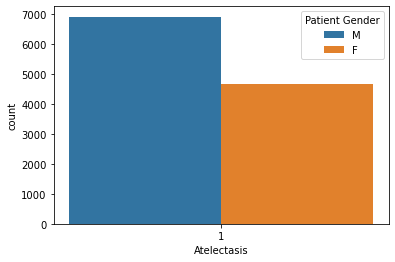

In [155]:
df_sample_pos = df[df["Atelectasis"] == 1] #*these will have pneumonia

sns.countplot(x='Atelectasis', hue='Patient Gender',data=df_sample_pos)

Overall, the patients with Atelectasis scale a lot younger. Some of them are even in their 30s.


[(1.0, 90.0)]

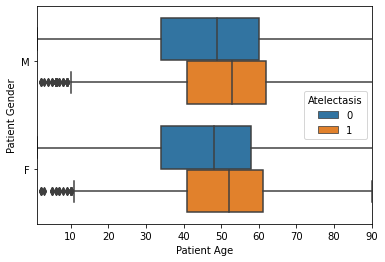

In [156]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Atelectasis', data=df)

print("Overall, the patients with Atelectasis scale a lot younger. Some of them are even in their 30s.")

ax.set(xlim=(1, 90))

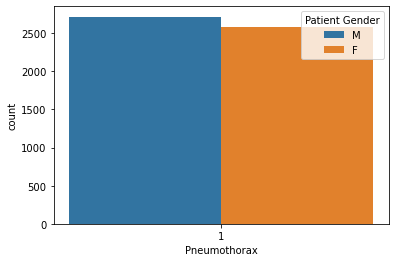

In [157]:
df_sample_pos = df[df["Pneumothorax"] == 1] #*these will have pneumonia

sns.countplot(x='Pneumothorax', hue='Patient Gender',data=df_sample_pos)

Same with Pneumothorax. Much younger patients, some even in their 30s.


[(1.0, 90.0)]

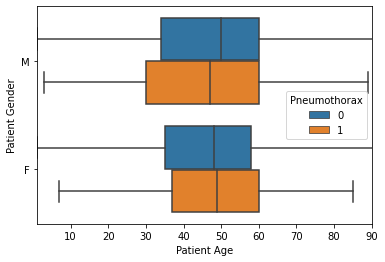

In [158]:
ax = sns.boxplot(x='Patient Age',y='Patient Gender', hue='Pneumothorax', data=df)

print("Same with Pneumothorax. Much younger patients, some even in their 30s.")

ax.set(xlim=(1, 90))

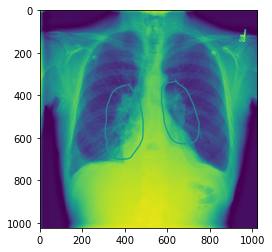

This XRAY was marked Pneumonia positive by the dataset. The XRAY Does obviously have lung infiltration!


In [159]:
from IPython.display import Image
#display(Image(filename='MARKEDpositive_00009507_002.png'))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('MARKEDpositive_00009507_002.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked Pneumonia positive by the dataset. The XRAY Does obviously have lung infiltration!")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([152486.,  96325., 118039.,  87941.,  98768., 112874.,  98734.,
         86379., 127355.,  69675.]),
 array([0.        , 0.0972549 , 0.1945098 , 0.2917647 , 0.3890196 ,
        0.4862745 , 0.5835294 , 0.68078434, 0.7780392 , 0.8752941 ,
        0.972549  ], dtype=float32),
 <a list of 10 Patch objects>)

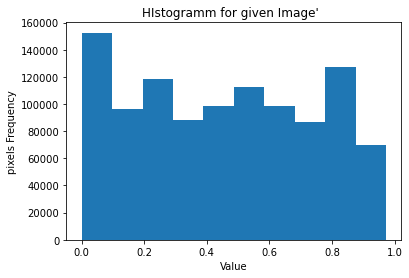

In [160]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

img=mpimg.imread('MARKEDpositive_00009507_002.png')
#image sclicing into 2D.
#x=img[:,0]
print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))
#x = img
# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)


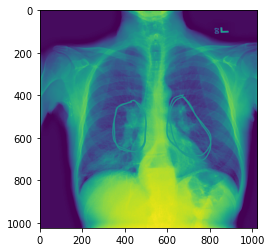

This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!


In [161]:
#display(Image(filename='MARKEDpositive_00009507_004.png'))

img = mpimg.imread('MARKEDpositive_00009507_004.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([217373.,  60239., 127095., 120707., 105600., 123086.,  95597.,
         74542.,  72381.,  51956.]),
 array([0.        , 0.09647059, 0.19294117, 0.28941175, 0.38588235,
        0.48235294, 0.5788235 , 0.6752941 , 0.7717647 , 0.8682353 ,
        0.9647059 ], dtype=float32),
 <a list of 10 Patch objects>)

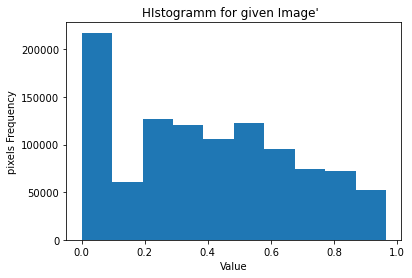

In [162]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('MARKEDpositive_00009507_004.png')
#image sclicing into 2D.
#x=img[:,:,0]
x=img[:,0]
#x = img
# x co-ordinate denotation.

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

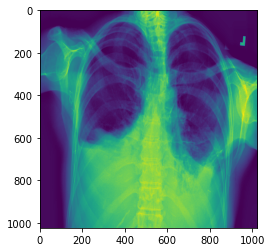

This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye


In [163]:
#display(Image(filename='CLEAR_negative_00000099_010.png'))

img = mpimg.imread('CLEAR_negative_00000099_010.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([281500., 123652.,  79779.,  61331.,  73018.,  91475., 105879.,
        164652.,  65078.,   2212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

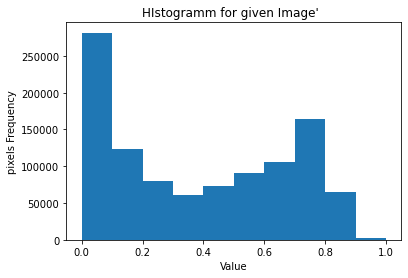

In [164]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('CLEAR_negative_00000099_010.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

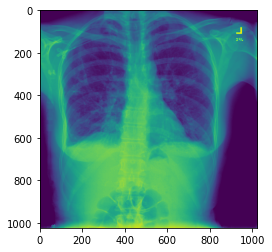

This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye


In [165]:
#display(Image(filename='CLEARnegative_00001974_014.png'))

img = mpimg.imread('CLEARnegative_00001974_014.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY is marked negative via the dataset. It does appear to have NO serious lung infiltration that I can see with my naked eye")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([191695., 128971., 118952.,  96554., 104058., 116908., 131843.,
        144359.,  14137.,   1099.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

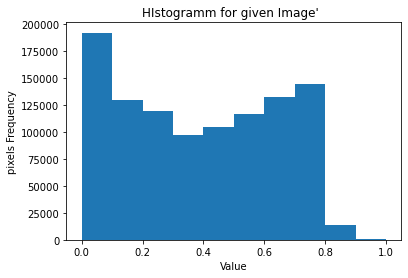

In [166]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('CLEARnegative_00001974_014.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

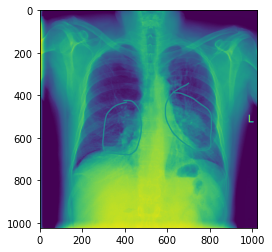

This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!


In [167]:
#display(Image(filename='MARKEDnegative_00000103_010.png'))

img = mpimg.imread('MARKEDnegative_00000103_010.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked positive by the dataset. The XRAY Does obviously have lung infiltration!")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([159170.,  79277.,  97288.,  95961., 121376., 143152., 131996.,
         77688., 112482.,  30186.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

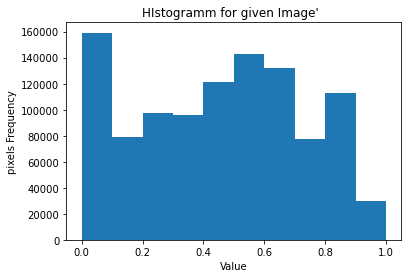

In [168]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('MARKEDnegative_00000103_010.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

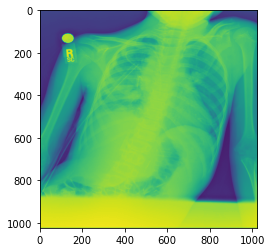

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [169]:
#display(Image(filename='FALSE_NEGATIVES00007830_005.png'))

img = mpimg.imread('FALSE_NEGATIVES00007830_005.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([  9278.,  97951.,  28677.,  28958.,  48732., 104262., 200819.,
        263470., 166482.,  99947.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

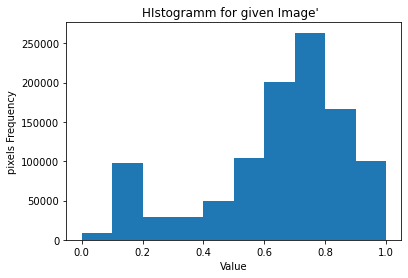

In [170]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007830_005.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

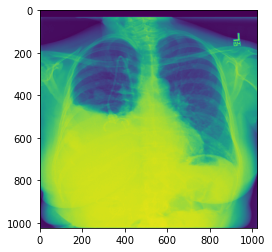

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [171]:
#display(Image(filename='FALSE_NEGATIVES00007848_004.png'))

img = mpimg.imread('FALSE_NEGATIVES00007848_004.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 91103.,  44279.,  95222.,  64178.,  57292.,  71625., 115648.,
         93713., 186480., 229036.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

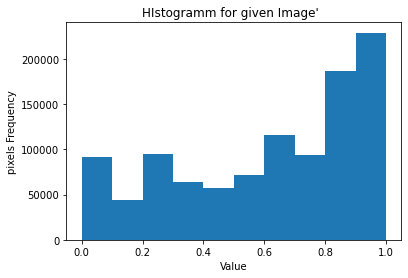

In [172]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007848_004.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

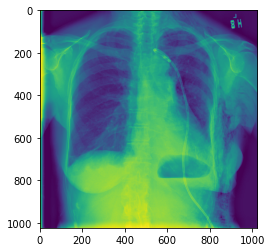

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [173]:
#display(Image(filename='FALSE_NEGATIVES00007865_003.png'))

img = mpimg.imread('FALSE_NEGATIVES00007865_003.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([123596., 107106., 131271.,  98060., 108057., 130749., 125405.,
        121060.,  88649.,  14623.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

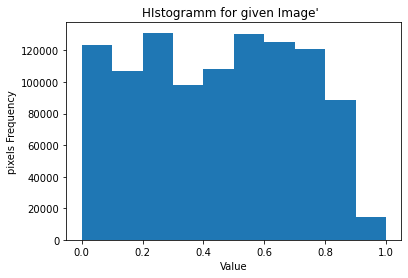

In [174]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007865_003.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

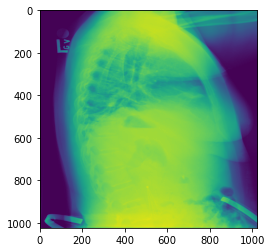

This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.


In [175]:
#display(Image(filename='FALSE_NEGATIVES00007922_002.png'))

img = mpimg.imread('FALSE_NEGATIVES00007922_002.png')
imgplot = plt.imshow(img)
plt.show()

print("This XRAY was marked Pneumonia negative by the dataset. However it is obviously poor quality and may confuse a model during training.")

Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([182286.,  47013.,  43133.,  38705.,  45650.,  78285., 151617.,
        172188., 261741.,  27958.]),
 array([0.        , 0.0972549 , 0.1945098 , 0.2917647 , 0.3890196 ,
        0.4862745 , 0.5835294 , 0.68078434, 0.7780392 , 0.8752941 ,
        0.972549  ], dtype=float32),
 <a list of 10 Patch objects>)

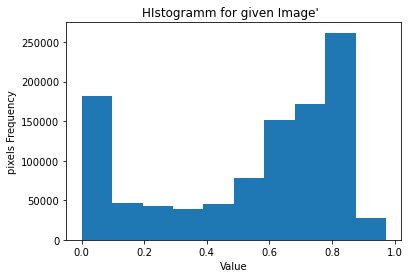

In [176]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('FALSE_NEGATIVES00007922_002.png')
#image sclicing into 2D.
#x=img[:,:,0]
x = img
x=img[:,0]

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")
# imshow function with comperision of gray level value.
#plt.imshow(x,cmap="gray")
#plot the image on a plane.
#plt.show()

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
#hist function is used to plot the histogram of an image.
plt.hist(x)

In [177]:
print("Reviewer noted that I should plot histograms for a few Pneumonia and non Pneumonia Images")

print("Attain Pneumonia Images:")

df = df_original_copy

df_sample_pos = df[df["Pneumonia"] == 1] #*these will have pneumonia

print(len(df_sample_pos))

pne_filez = df_sample_pos["path"]

throttle = 0
pne_file_paths = []

for idx in pne_filez:
    print(idx)
    pne_file_paths.append(idx)
    throttle += 1
    if throttle == 7:
        break
        
print("Attain Non Pneumonia Images:")

df_sample_pos = df[df["No Finding"] == 1] #*these will not have pneumonia

no_finding_filez = df_sample_pos["path"]

throttle = 0
no_finding_paths = []

for idx in no_finding_filez:
    print(idx)
    no_finding_paths.append(idx)
    throttle += 1
    if throttle == 3:
        break
        
print("Attain only HERNIA images")

df_sample_pos = df[df["Pneumonia_or_Infiltration"] == 0]

hernia_only = df_sample_pos[df_sample_pos["Hernia"] == 1]

hernia_only_paths = hernia_only["path"]

throttle = 0
hernia_filez = []

for idx in hernia_only_paths:
    print(idx)
    hernia_filez.append(idx)
    throttle += 1
    if throttle == 3:
        break

Reviewer noted that I should plot histograms for a few Pneumonia and non Pneumonia Images
Attain Pneumonia Images:
1431
/data/images_001/images/00000013_010.png
/data/images_001/images/00000032_012.png
/data/images_001/images/00000056_000.png
/data/images_001/images/00000061_012.png
/data/images_001/images/00000061_015.png
/data/images_001/images/00000144_001.png
/data/images_001/images/00000150_002.png
Attain Non Pneumonia Images:
/data/images_001/images/00000002_000.png
/data/images_001/images/00000005_000.png
/data/images_001/images/00000005_001.png
Attain only HERNIA images
/data/images_001/images/00000003_000.png
/data/images_001/images/00000003_001.png
/data/images_001/images/00000003_002.png


Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([108072.,  67701., 105425., 120775., 185330., 184922., 135640.,
        132558.,   7046.,   1107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

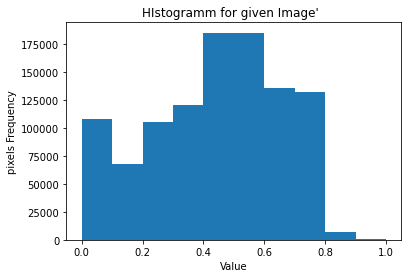

In [178]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[0])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 18486.,  12726.,  21633.,  37258., 117001., 197432., 194471.,
        240159., 165549.,  43861.]),
 array([0.00784314, 0.1027451 , 0.19764706, 0.292549  , 0.387451  ,
        0.48235294, 0.5772549 , 0.6721569 , 0.76705885, 0.86196077,
        0.95686275], dtype=float32),
 <a list of 10 Patch objects>)

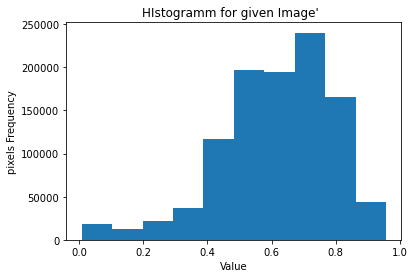

In [179]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[1])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 76111.,  31287.,  79091.,  94568.,  93931.,  73041.,  98805.,
        185581., 185512., 130649.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

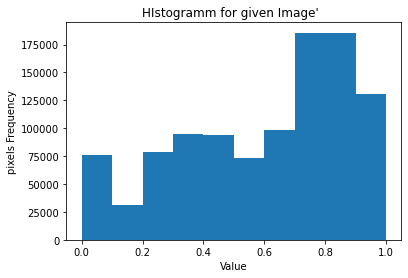

In [180]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[2])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([109702.,  32217.,  51422.,  98484., 186812., 180611., 145864.,
        116008., 127232.,    224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

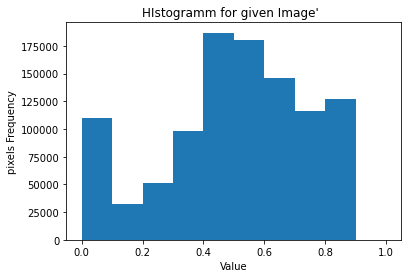

In [181]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[3])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([8.35250e+04, 3.64400e+04, 7.00280e+04, 1.22045e+05, 1.87280e+05,
        1.70904e+05, 1.31906e+05, 1.27474e+05, 1.18869e+05, 1.05000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

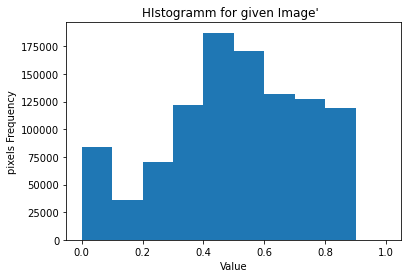

In [182]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[4])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 15025.,   8946.,  29644.,  62535.,  63285.,  86036., 191488.,
        290552., 226877.,  74188.]),
 array([0.00784314, 0.10117647, 0.1945098 , 0.28784314, 0.38117647,
        0.4745098 , 0.56784314, 0.6611765 , 0.7545098 , 0.84784317,
        0.9411765 ], dtype=float32),
 <a list of 10 Patch objects>)

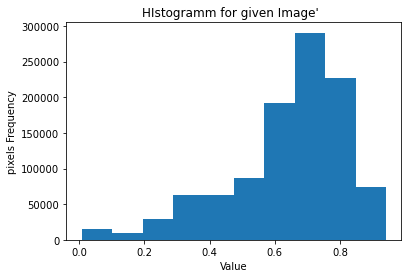

In [183]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[5])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([194358.,  53731., 115896., 130318., 172828., 119971.,  89200.,
         95326.,  72051.,   4897.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

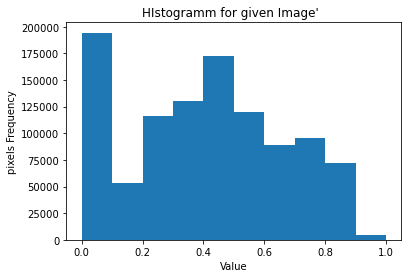

In [184]:
print("Pneumonia Image")

img=mpimg.imread(pne_file_paths[6])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

NON Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([  7733.,   3154.,  17113.,  55774.,  78733., 103683., 128735.,
        234017., 244338., 175296.]),
 array([0.        , 0.09882353, 0.19764706, 0.29647058, 0.39529413,
        0.49411765, 0.59294116, 0.6917647 , 0.79058826, 0.88941175,
        0.9882353 ], dtype=float32),
 <a list of 10 Patch objects>)

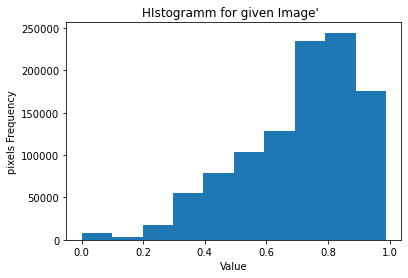

In [185]:
print("NON Pneumonia Image")

img=mpimg.imread(no_finding_paths[0])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

NON Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 43360.,  14714.,  30877.,  67649.,  89051., 109089., 129673.,
        169220., 218526., 176417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

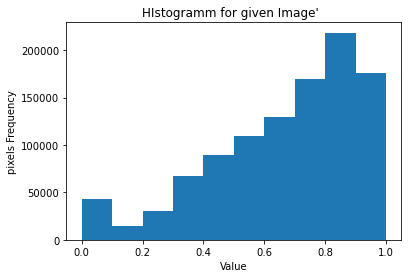

In [186]:
print("NON Pneumonia Image")

img=mpimg.imread(no_finding_paths[1])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

NON Pneumonia Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 49621.,  16985.,  16279.,  30058.,  52147., 105776., 251104.,
        420601., 104539.,   1466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

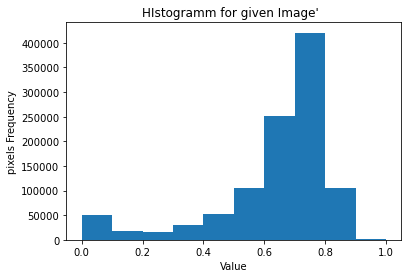

In [187]:
print("NON Pneumonia Image")

img=mpimg.imread(no_finding_paths[2])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

HERNIA Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 87172., 142974., 111033.,  84034.,  91727., 112973.,  96062.,
        105201., 167040.,  50360.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

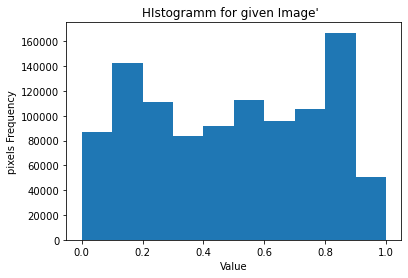

In [188]:
print("HERNIA Image")

img=mpimg.imread(hernia_filez[0])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

HERNIA Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([ 74568.,  29428.,  43557.,  89869.,  93383., 102204., 119094.,
        167047., 183264., 146162.]),
 array([0.02352941, 0.12117647, 0.21882352, 0.3164706 , 0.41411763,
        0.5117647 , 0.6094118 , 0.70705885, 0.80470586, 0.9023529 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

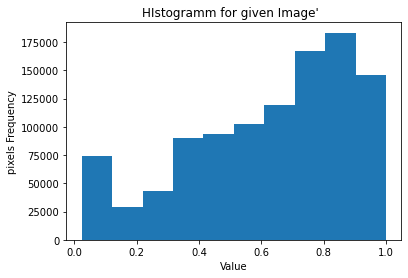

In [189]:
print("HERNIA Image")

img=mpimg.imread(hernia_filez[1])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)

HERNIA Image
Original Image Numpy Shape: (1024, 1024)
Flattened Image Numpy Shape: (1048576,)


(array([146184.,  37361.,  72323.,  81589.,  92799.,  88068.,  98363.,
        114714., 140759., 176416.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

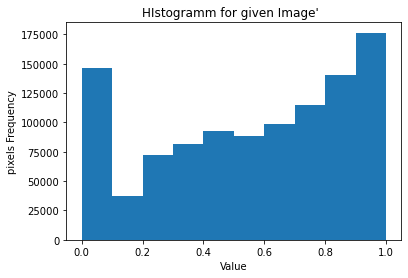

In [190]:
print("HERNIA Image")

img=mpimg.imread(hernia_filez[2])

x = img

print("Original Image Numpy Shape: " + str(img.shape))
x = tf.reshape(img,[-1])
print("Flattened Image Numpy Shape: " + str(x.shape))

# x co-ordinate denotation.
plt.xlabel("Value")
# y co-ordinate denotation.
plt.ylabel("pixels Frequency")
# title of an image .
plt.title("Original Image")

plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")

plt.hist(x)